<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Конфигурация-для-подключения-к-базе-данных" data-toc-modified-id="Конфигурация-для-подключения-к-базе-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Конфигурация для подключения к базе данных</a></span></li><li><span><a href="#Задание-1" data-toc-modified-id="Задание-1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задание 1</a></span></li><li><span><a href="#Задание-2" data-toc-modified-id="Задание-2-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Задание 2</a></span></li><li><span><a href="#Задание-3" data-toc-modified-id="Задание-3-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Задание 3</a></span></li><li><span><a href="#Задание-4" data-toc-modified-id="Задание-4-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Задание 4</a></span></li><li><span><a href="#Задание-5" data-toc-modified-id="Задание-5-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Задание 5</a></span></li><li><span><a href="#Задание-6" data-toc-modified-id="Задание-6-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Задание 6</a></span></li><li><span><a href="#Задание-7" data-toc-modified-id="Задание-7-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Задание 7</a></span></li><li><span><a href="#Задание-8" data-toc-modified-id="Задание-8-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Задание 8</a></span></li><li><span><a href="#Задание-9" data-toc-modified-id="Задание-9-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Задание 9</a></span></li><li><span><a href="#Задание-10" data-toc-modified-id="Задание-10-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Задание 10</a></span></li></ul></div>

# Задачи проекта

- необходимо подключиться к базе с помощью SQLAlchemy;
- ответить на поставленные вопросы с помощью SQL-запросов.

## Конфигурация для подключения к базе данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from IPython.display import Image
import seaborn as sns # импортируем библиотеки

In [2]:
db_config = {
    'user': 'praktikum_student', # имя пользователя
    'pwd': 'Sdf4$2;d-d30pp', # пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения
    'db': 'data-analyst-advanced-sql' # название базы данных
}  

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
) # создание подключения

engine = create_engine(connection_string) 

In [3]:
query = '''
SELECT *
FROM stackoverflow.users
LIMIT 10;
'''

sample_df = pd.read_sql_query(query, con=engine)

sample_df # проверим

,id,creation_date,display_name,last_access_date,location,reputation,views
0,1,2008-07-31 14:22:31,Jeff Atwood,2018-08-29 02:34:23,"El Cerrito, CA",44300,408587
1,2,2008-07-31 14:22:31,Geoff Dalgas,2018-08-23 17:31:56,"Corvallis, OR",3491,23966
2,3,2008-07-31 14:22:31,Jarrod Dixon,2018-08-30 20:56:24,"Raleigh, NC, United States",13418,24396
3,4,2008-07-31 14:22:31,Joel Spolsky,2018-08-14 22:18:15,"New York, NY",28768,73755
4,5,2008-07-31 14:22:31,Jon Galloway,2018-08-29 16:48:36,"San Diego, CA",39172,11700
5,8,2008-07-31 21:33:24,Eggs McLaren,2018-04-09 02:04:56,None,942,6372
6,9,2008-07-31 21:35:27,Kevin Dente,2018-08-30 18:18:03,"Oakland, CA",14337,4949
7,11,2008-08-01 00:59:11,Anonymous User,2008-08-01 00:59:11,None,1890,2123
8,13,2008-08-01 04:18:05,Chris Jester-Young,2018-08-30 02:47:23,"Raleigh, NC, United States",177138,35414
9,17,2008-08-01 12:02:22,Nick Berardi,2018-01-22 01:35:38,"Issaquah, WA",44443,4786


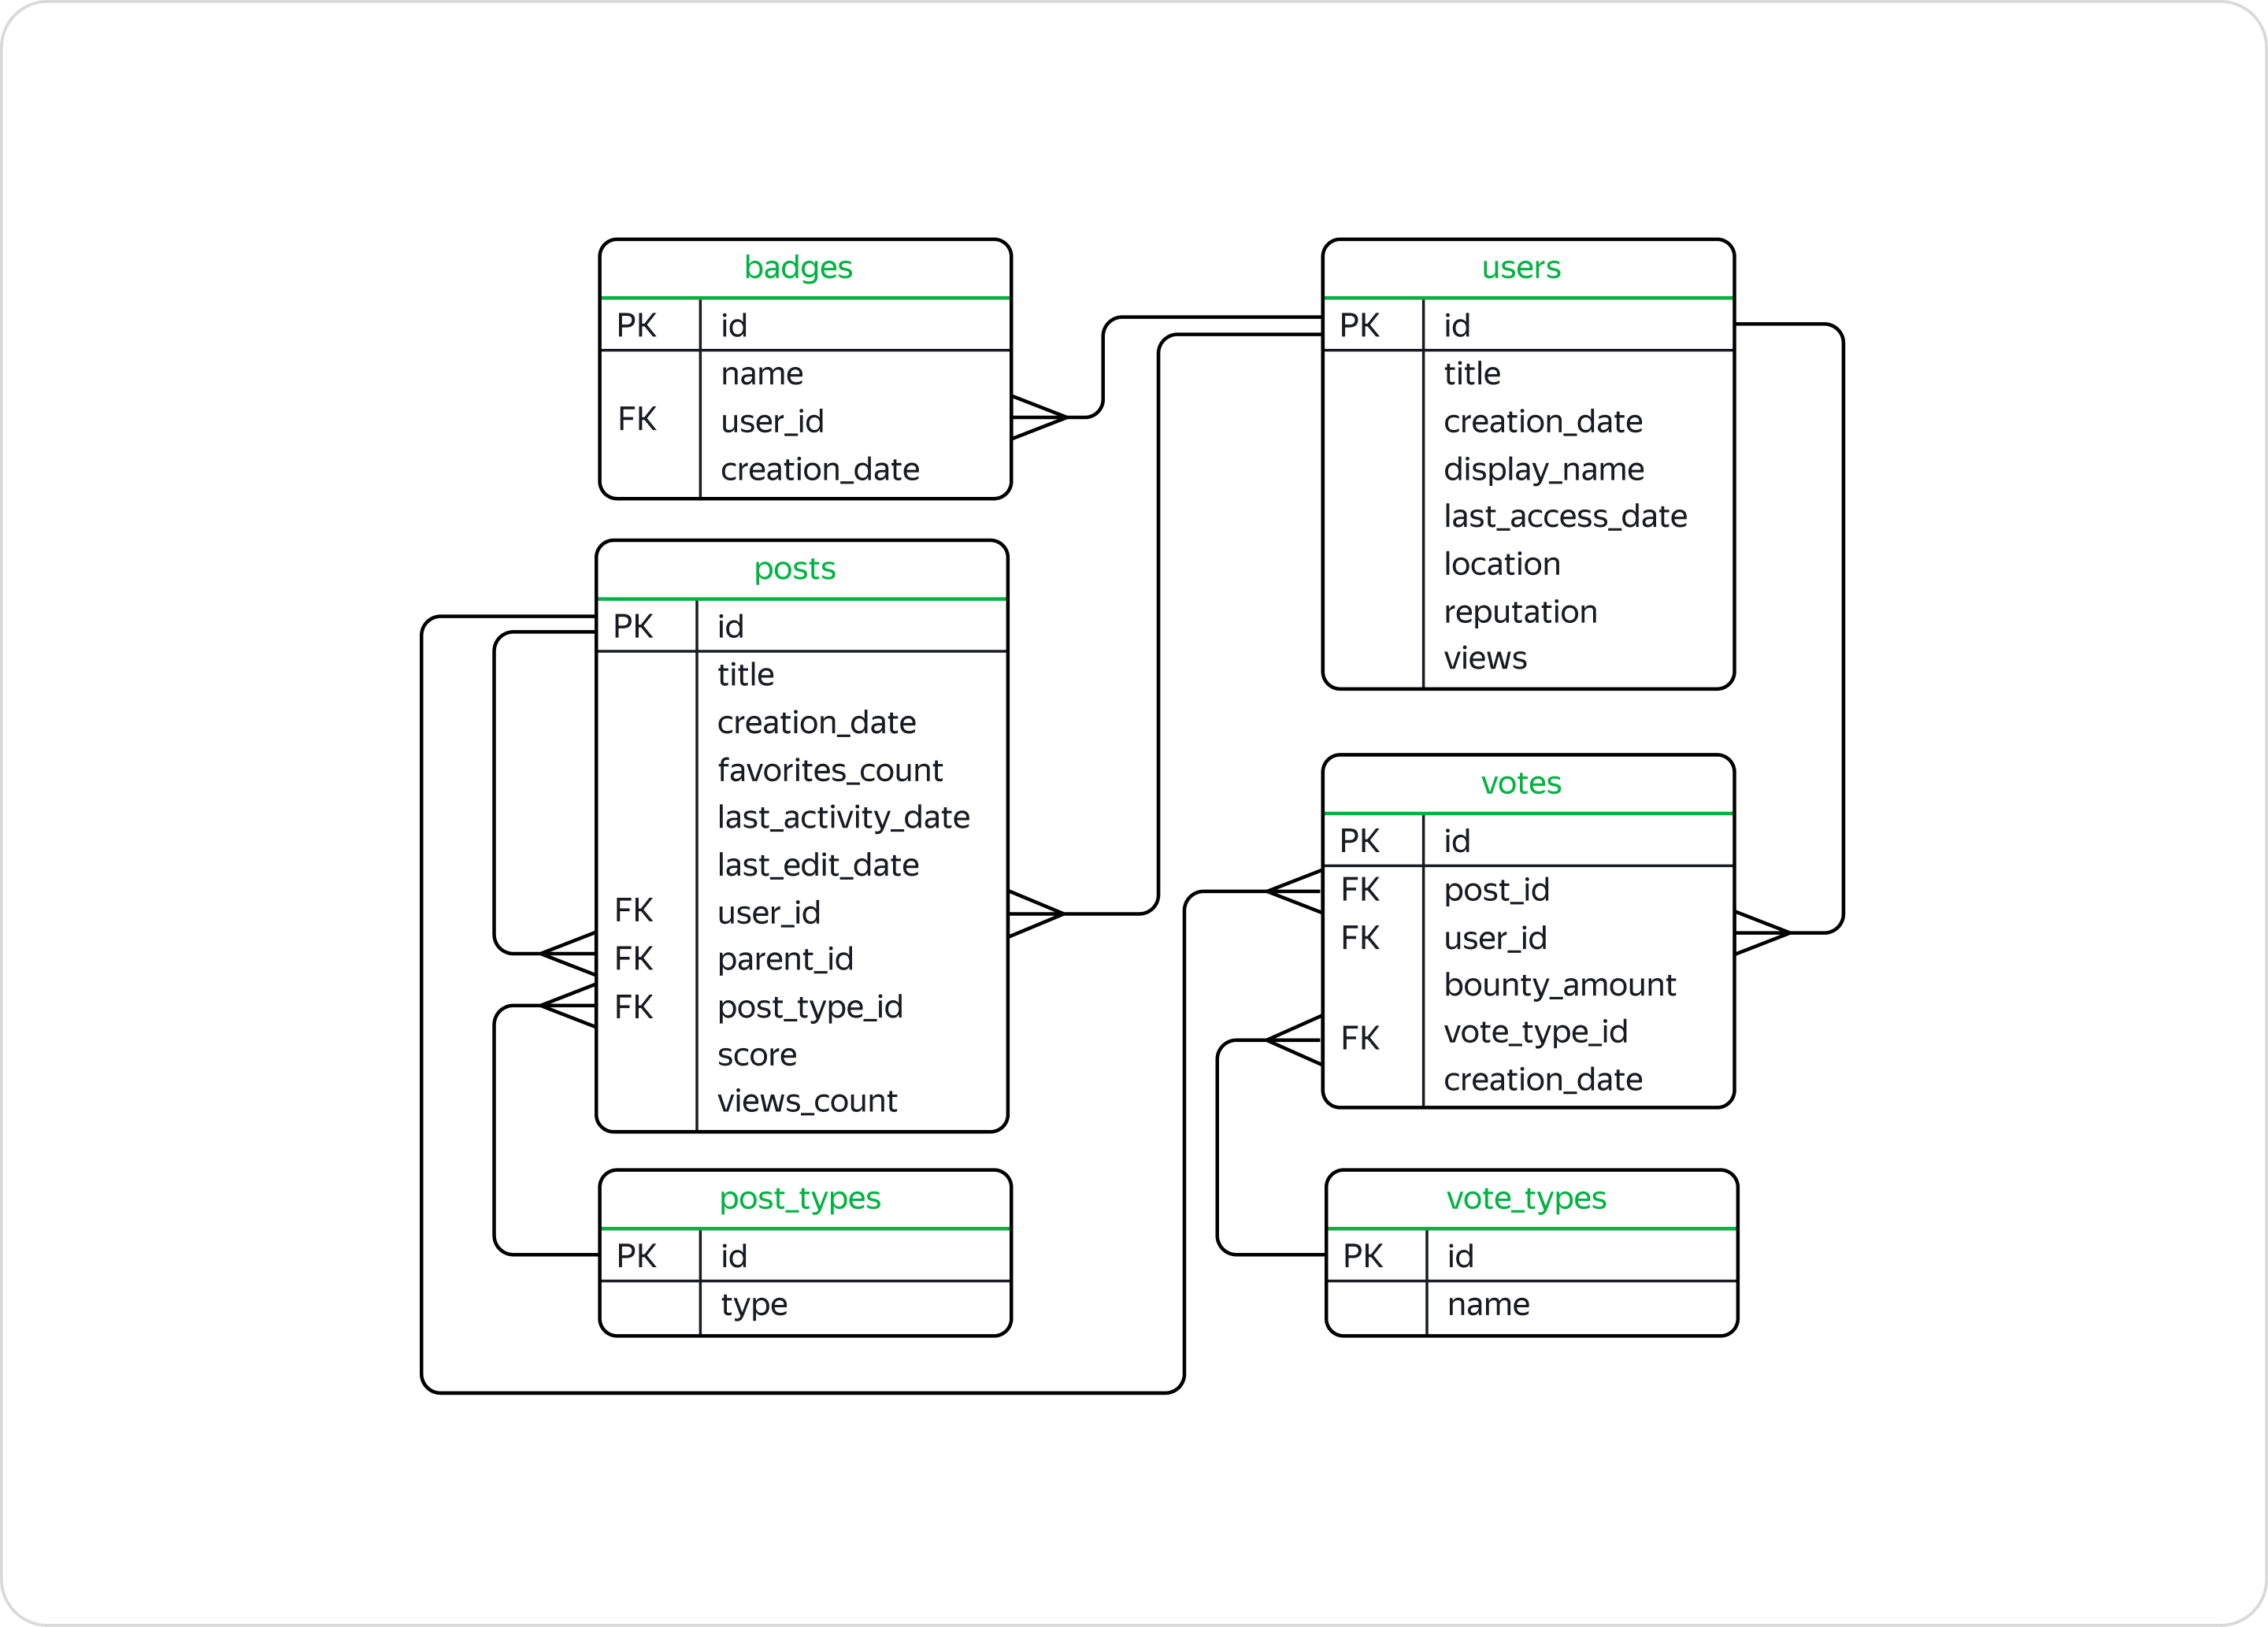

In [4]:
Image('D:/pictures/stackoverflow.png') # схема

## Задание 1

Выведите общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

| month_date  | total_views |
| ------------- | ------------- |
| 2008-09-01  | 452928568  |
| 2008-10-01  | 365400138  |
| ...         | ... |

In [5]:
# напишите запрос
query = '''
SELECT DATE_TRUNC('month', creation_date) AS month_date,
       SUM(views_count) AS total_views
FROM stackoverflow.posts p
WHERE creation_date BETWEEN '2008-01-01' AND '2008-12-31'
GROUP BY month_date
ORDER BY total_views DESC
'''
# выполните запрос

In [6]:
task_1 = pd.read_sql_query(query, con=engine)

task_1

,month_date,total_views
0,2008-09-01,452928568
1,2008-10-01,365400138
2,2008-11-01,221759651
3,2008-12-01,197792841
4,2008-08-01,131367083
5,2008-07-01,669895


In [7]:
task_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
month_date     6 non-null datetime64[ns]
total_views    6 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 224.0 bytes


**Выводы:**

- отсутствует информация с января по июнь 2008 года включительно;
- вероятно, что малое количество просмотров связано с сезоном отпусков;
- больше всего просмотров в сентябре, скорее всего это связано с активной работой над годовыми задачами;
- далее мы видим, что к концу года по мере закрытия годовых задач просмотров становится меньше.

## Задание 2

Выведите список имён самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Отсортируйте результат по полю с именами в лексикографическом порядке.

| display_name |
| ------------ |
| 1800 INFORMATION |
| Adam Bellaire |
| Adam Davis |
| ... |

In [8]:
# напишите запрос
query = '''
SELECT u.display_name
FROM stackoverflow.users u
JOIN stackoverflow.posts p ON u.id = p.user_id
JOIN stackoverflow.post_types pt ON pt.id = p.post_type_id
WHERE pt.type = 'Answer'
AND p.creation_date >= DATE_TRUNC('day', u.creation_date)
AND p.creation_date <= DATE_TRUNC('day', u.creation_date) + INTERVAL '1 month'
GROUP BY u.display_name
HAVING COUNT(p.id) > 100
ORDER BY u.display_name
'''
# выполните запрос

In [9]:
task_2 = pd.read_sql_query(query, con=engine)

task_2

,display_name
0,1800 INFORMATION
1,Adam Bellaire
2,Adam Davis
3,Adam Liss
4,Alan
...,...
71,leppie
72,lomaxx
73,mattlant
74,paxdiablo


## Задание 3

Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

| month | count |
| ------|------ |
| 2008-12-01 | 17641 |
| 2008-11-01 | 182984 |
| ... | ... |

In [10]:
# напишите запрос
query = '''
WITH temp as 
(SELECT u.id
FROM stackoverflow.users u
WHERE CAST(DATE_TRUNC ('month', u.creation_date) AS date) = '2008-09-01'
AND u.id IN (SELECT p.user_id
            FROM stackoverflow.posts p
            WHERE CAST(DATE_TRUNC('month', p.creation_date) AS date) = '2008-12-01'))

SELECT DATE_TRUNC('month', temp_2.creation_date) as month,
COUNT(*)
FROM(
    SELECT t.id,
    p.creation_date,
    p.views_count
    FROM temp as t
    JOIN stackoverflow.posts p on t.id = p.user_id) as temp_2
GROUP BY month
ORDER BY month DESC
'''
# выполните запрос

In [11]:
task_3 = pd.read_sql_query(query, con=engine)

task_3

,month,count
0,2008-12-01,17641
1,2008-11-01,18294
2,2008-10-01,27171
3,2008-09-01,24870
4,2008-08-01,32


**Выводы:**

- аномальные значения появились в **августе**, скорее всего пользователи, которые зарегистрировались в **сентябре** 2008 года не могли оставить посты месяцем ранее. Из-за чего в **августе** 2008 года малое количество постов от данных пользователей;
- как мы предположили ранее: на **сентябрь** и **октябрь** приходится большее количество постов из-за активной работы над годовыми задачами, далее идет спад постов к концу года.

## Задание 4

Используя данные о постах, выведите несколько полей:

- идентификатор пользователя, который написал пост;
- дата создания поста;
- количество просмотров у текущего поста;
- сумму просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

| user_id | creation_date | views_count | cumulative_count |
| ------ | -------------- | ----------- | ---------------- |
| 1 | 2008-07-31 23:41:00  | 480476   | 480476  |
| 1 | 2008-07-31 23:55:38  | 136033 | 616509  | 
| 1 | 2008-07-31 23:56:41  | 0 |  616509  |
| ... | ... | ... | ... |
| 2 | 2008-07-31 23:56:41 | 79087  | 79087 |
| 2 | 2008-08-01 05:09:56 | 65443 | 144530 |
| ... | ...  | ...  | ...  |

In [12]:
# напишите запрос
query = '''
SELECT user_id, 
       creation_date, 
       views_count,
       SUM(views_count) OVER(PARTITION BY user_id ORDER BY creation_date) as cumulative_count
FROM stackoverflow.posts
ORDER BY user_id, creation_date;
'''
# выполните запрос

In [13]:
task_4 = pd.read_sql_query(query, con=engine)

task_4

,user_id,creation_date,views_count,cumulative_count
0,1,2008-07-31 23:41:00,480476,480476
1,1,2008-07-31 23:55:38,136033,616509
2,1,2008-07-31 23:56:41,0,616509
3,1,2008-08-04 02:45:08,0,616509
4,1,2008-08-04 04:31:03,0,616509
...,...,...,...,...
243791,5696608,2008-12-23 16:00:37,0,2804
243792,5696608,2008-12-23 17:35:09,0,2804
243793,5696608,2008-12-24 01:02:48,0,2804
243794,5696608,2008-12-30 14:34:45,0,2804


## Задание 5

Найдите среднее количество постов пользователей в день за август 2008 года. Отберите данные о пользователях, которые опубликовали больше 120 постов за август. Дни без публикаций не учитывайте. 

Отсортируйте результат по возрастанию среднего количества постов. Значения можно не округлять.

| user_id | avg_daily |
| ------- | --------- |
| 116     | 4.8076923076923077 |
| 234     | 5.3043478260869565 |
| ...     | ... |

In [14]:
# напишите запрос
query = '''
SELECT p.user_id,
       COUNT(p.id)::float / COUNT(DISTINCT(DATE_TRUNC('day', p.creation_date))) AS avg_daily
FROM stackoverflow.posts AS p
WHERE creation_date >= '2008-08-01' AND creation_date <= '2008-08-31 23:59:59'
AND p.user_id IN (
                  SELECT user_id
                  FROM stackoverflow.posts
                  WHERE creation_date >= '2008-08-01' AND creation_date <= '2008-08-31 23:59:59'
                  GROUP BY user_id
                  HAVING COUNT(id) > 120)
GROUP BY p.user_id
ORDER BY 2
'''

# выполните запрос

In [15]:
task_5 = pd.read_sql_query(query, con=engine)

task_5

,user_id,avg_daily
0,116,4.777778
1,234,5.208333
2,91,5.681818
3,905,7.000000
4,383,7.277778


## Задание 6

Сколько в среднем дней в период с 1 по 7 декабря 2008 года включительно пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат. 

| result |
| -----  |
| <целое число> |

In [16]:
# напишите запрос
query = '''
WITH temp AS (
SELECT user_id,
       COUNT(DISTINCT(DATE_TRUNC('day', creation_date))) AS dt
FROM stackoverflow.posts
WHERE DATE_TRUNC('day', creation_date) >= '2008-12-01'
AND DATE_TRUNC('day', creation_date) <= '2008-12-07'
GROUP BY user_id)

SELECT ROUND(AVG(dt), 0)
FROM temp
'''

# выполните запрос

In [17]:
task_6 = pd.read_sql_query(query, con=engine)

task_6

,round
0,2.0


<details>

<summary>Подсказка</summary>

Посчитайте, сколько активных дней было у каждого пользователя. Добавьте данные во временную таблицу и используйте в основном запросе.
</details>

**Выводы:**

- в период с **1 по 7 декабря** 2008 года активные пользователи взаимодействовали с платформой в среднем **2** раза.

## Задание 7

Выведите историю активности каждого пользователя в таком виде: идентификатор пользователя, дата публикации поста. Отсортируйте вывод по возрастанию идентификаторов пользователей, а для каждого пользователя — по возрастанию даты публикации.

Добавьте в таблицу новое поле: для каждого поста в нём будет указано название месяца предпоследней публикации пользователя относительно текущей. Если такой публикации нет, укажите `NULL`.

Посмотрите внимательно на образец таблицы: для первых двух постов предпоследней публикации нет, но, начиная с третьего поста, в новое поле входит нужный месяц. Для следующего пользователя в первые две записи поля `second_last_month` тоже войдёт `NULL`.

| user_id | creation_date | second_last_month |
| ------- | ------------- | ----------------- |
| 1       | 2008-07-31 23:41:00 | NULL |
| 1       | 2008-07-31 23:55:38 | NULL |
| 1       | 2008-07-31 23:56:41 | Июль |
| 1       | 2008-08-04 02:45:08 | Июль |
| 1       | 2008-08-04 04:31:03 | Июль |
| 1       | 2008-08-04 08:04:42 | Август |
| ... | ... | ... |

In [18]:
# напишите запрос
query = '''
WITH temp as (SELECT user_id,
       creation_date,
       LAG(creation_date, 2, NULL) OVER(PARTITION BY user_id ORDER BY creation_date) as second_last_month
FROM stackoverflow.posts)

SELECT user_id,
       creation_date,
       to_char(second_last_month, 'Month')
FROM temp      
'''

# выполните запрос

In [19]:
task_7 = pd.read_sql_query(query, con=engine)

task_7

,user_id,creation_date,to_char
0,1,2008-07-31 23:41:00,None
1,1,2008-07-31 23:55:38,None
2,1,2008-07-31 23:56:41,July
3,1,2008-08-04 02:45:08,July
4,1,2008-08-04 04:31:03,July
...,...,...,...
243791,5696608,2008-12-23 16:00:37,December
243792,5696608,2008-12-23 17:35:09,December
243793,5696608,2008-12-24 01:02:48,December
243794,5696608,2008-12-30 14:34:45,December


## Задание 8

Рассчитайте аналог Retention Rate по месяцам для пользователей StackOverflow. Объедините пользователей в когорты по месяцу их первого поста. Возвращение определяйте по наличию поста в текущем месяце. 

| cohort_dt | session_date | users_cnt | cohort_users_cnt | retention_rate |
| --------- | ------------ | --------- | ---------------- | -------------- |
| 2008-07-01 00:00:00 | 2008-07-01 00:00:00 | 3 | 3 | 100 |
| 2008-07-01 00:00:00 | 2008-08-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-09-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-10-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-11-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-12-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-08-01 00:00:00 | 2008-08-01 00:00:00 | 2151 | 2151 | 100 | 
| ... | ... | ... | ... | ... |

In [20]:
# напишите запрос
query = '''
WITH profile AS (SELECT user_id,
     first_post,
     COUNT(*) OVER (PARTITION BY first_post) AS cohort_users_cnt
     FROM(SELECT user_id,
          MIN(DATE_TRUNC('month', creation_date)) AS first_post
     FROM stackoverflow.posts
     GROUP BY user_id) as temp),

sessions AS (SELECT user_id,
       DATE_TRUNC('month', creation_date) AS session_date
FROM stackoverflow.posts
GROUP BY user_id,
         session_date)

SELECT p.first_post cohort_dt,
       session_date,
       COUNT(p.user_id) AS users_cnt,
       cohort_users_cnt,
       ROUND(COUNT(p.user_id) * 100.0 / cohort_users_cnt, 2) AS retention_rate
FROM profile p
JOIN sessions s ON p.user_id = s.user_id
GROUP BY 1,
         2,
         4; 
         

'''

# выполните запрос

In [21]:
task_8 = pd.read_sql_query(query, con=engine)

task_8

,cohort_dt,session_date,users_cnt,cohort_users_cnt,retention_rate
0,2008-07-01,2008-07-01,3,3,100.00
1,2008-07-01,2008-08-01,2,3,66.67
2,2008-07-01,2008-09-01,1,3,33.33
3,2008-07-01,2008-10-01,2,3,66.67
4,2008-07-01,2008-11-01,1,3,33.33
5,2008-07-01,2008-12-01,2,3,66.67
6,2008-08-01,2008-08-01,2151,2151,100.00
7,2008-08-01,2008-09-01,1571,2151,73.04
8,2008-08-01,2008-10-01,1275,2151,59.27
9,2008-08-01,2008-11-01,1050,2151,48.81


In [22]:
task_8_pivot = pd.pivot_table(task_8,
                             index = 'cohort_dt',
                             columns = 'session_date',
                             values = 'retention_rate')

task_8_pivot # посмотрим

session_date,2008-07-01,2008-08-01,2008-09-01,2008-10-01,2008-11-01,2008-12-01
cohort_dt,,,,,,
2008-07-01,100.0,66.67,33.33,66.67,33.33,66.67
2008-08-01,NaN,100.00,73.04,59.27,48.81,41.56
2008-09-01,NaN,NaN,100.00,53.82,38.63,32.56
2008-10-01,NaN,NaN,NaN,100.00,45.19,33.65
2008-11-01,NaN,NaN,NaN,NaN,100.00,40.36
2008-12-01,NaN,NaN,NaN,NaN,NaN,100.00


In [23]:
task_8_pivot.index

DatetimeIndex(['2008-07-01', '2008-08-01', '2008-09-01', '2008-10-01',
               '2008-11-01', '2008-12-01'],
              dtype='datetime64[ns]', name='cohort_dt', freq=None)

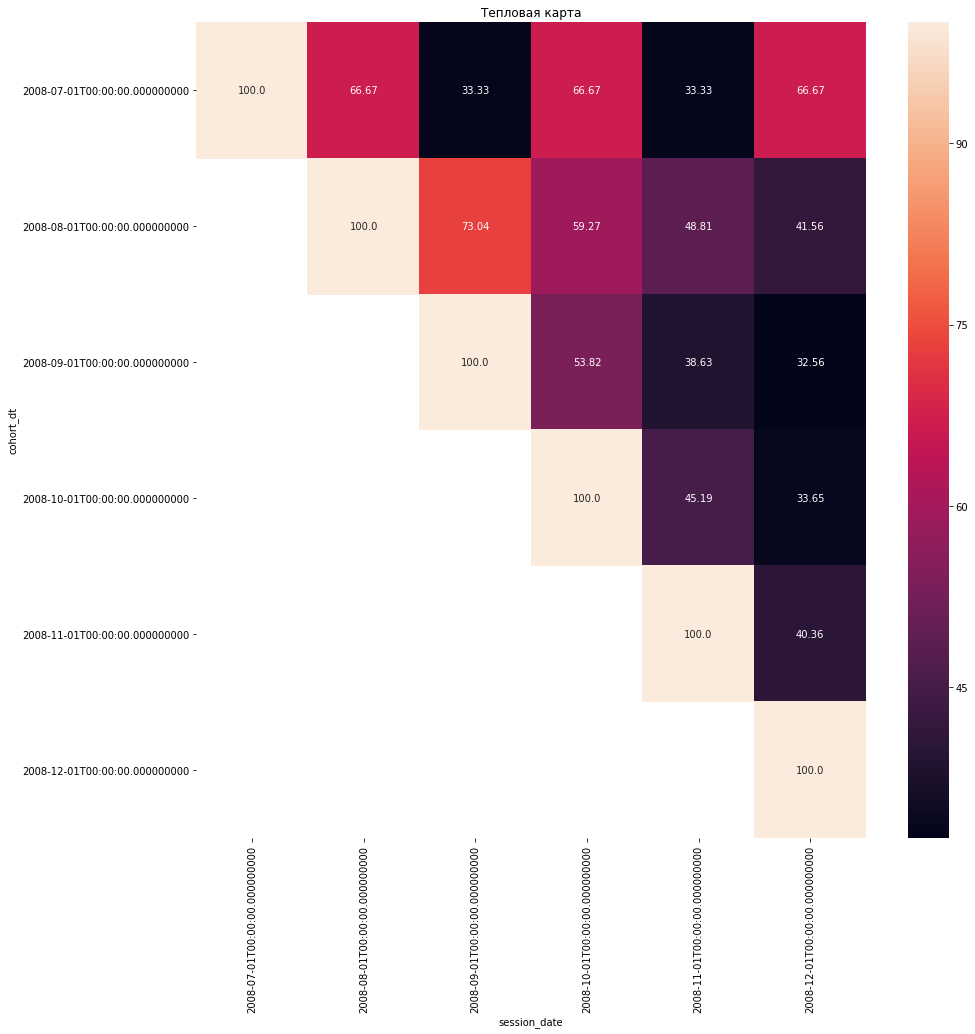

In [24]:
plt.figure(figsize=(15,15)) # зададим размер графика

sns.heatmap(task_8_pivot,
           annot=True,
           fmt='') # строим тепловую карту


plt.title('Тепловая карта')
plt.show();

**Выводы:**

- самый высоких показатель удержания показала когорта от **августа** 2008 года. Скорее всего это связано с активной работой над готовыми задачами;
- самый низкий показатель удержания у когорты от **ноября** 2008 года. На второй месяц процент пользователей составил **40,36%**.

## Задание 9

На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:

- номер месяца;
- количество постов за месяц;
- процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным.

| creation_month | posts_count | percentage |
| -------------- | ----------- | ---------- |
| 9 | 70731 | NULL |
| 10 | 63102 | -11 |
| ... | ... | ... |

In [25]:
# напишите запрос
query = '''
WITH temp AS (SELECT EXTRACT(month from creation_date) AS creation_month,
          COUNT(*) AS posts_count
FROM stackoverflow.posts
WHERE creation_date >= '2008-09-01' AND creation_date <= '2008-12-31 23:59:59'
GROUP BY creation_month)

SELECT creation_month,
       posts_count,
       ROUND(((posts_count / previous_month::numeric) * 100) - 100, 2) AS percentage
FROM (SELECT *,
     LAG(posts_count) OVER() AS previous_month
     FROM temp) as temp_2

'''

# выполните запрос

In [26]:
task_9 = pd.read_sql_query(query, con=engine)

task_9

,creation_month,posts_count,percentage
0,9.0,70371,NaN
1,10.0,63102,-10.33
2,11.0,46975,-25.56
3,12.0,44592,-5.07


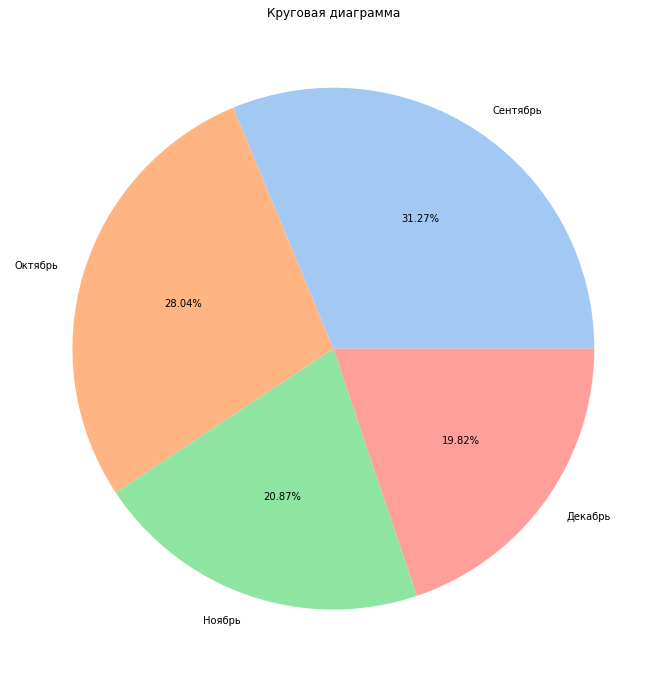

In [27]:
plt.figure(figsize=(12,12)) # зададим размер графика

labels = ['Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
colors = sns.color_palette('pastel')[0:5] # зададим подписи и палитру

plt.pie(task_9['posts_count'], labels = labels, colors=colors, autopct='%1.2f%%')


plt.title('Круговая диаграмма')
plt.show();

## Задание 10

Выгрузите данные активности пользователя, который опубликовал больше всего постов за всё время. Выведите данные за октябрь 2008 года в таком виде:

- номер недели;
- дата и время последнего поста, опубликованного на этой неделе.

| week_creation | creation_date |
| ------------- | ------------- |
| 40 | 2008-10-05 09:00:58 |
| 41 | 2008-10-12 21:22:23 |
| ... | ... |

In [28]:
# напишите запрос
query = '''
WITH the_most_active AS 
(SELECT user_id,
        ROW_NUMBER() OVER(ORDER BY posts_count desc) AS rank
FROM(SELECT user_id,
            COUNT(*) posts_count
     FROM stackoverflow.posts
     WHERE creation_date >= '2008-10-01' AND creation_date <= '2008-10-31'
     GROUP BY user_id) AS temp)

SELECT EXTRACT(week from p.creation_date) as week_creation,
       MAX(p.creation_date) as creation_date
FROM the_most_active tma
JOIN stackoverflow.posts p ON p.user_id = tma.user_id
WHERE RANK = 1
AND creation_date >= '2008-10-01' AND creation_date <= '2008-10-31'
GROUP BY week_creation
'''

# выполните запрос

In [29]:
task_10 = pd.read_sql_query(query, con=engine)

task_10

,week_creation,creation_date
0,40.0,2008-10-05 09:00:58
1,41.0,2008-10-12 21:22:23
2,42.0,2008-10-19 06:49:30
3,43.0,2008-10-26 21:44:36
4,44.0,2008-10-30 22:50:00
